In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
import pandas as pd
import io

# Read the uploaded CSV file
df = pd.read_csv(io.BytesIO(uploaded['ev_dataset.csv']))
print("✅ Dataset loaded successfully!")
df.head()

NameError: name 'uploaded' is not defined

In [5]:
# Upload and read CSV (single self-contained cell)
from google.colab import files
import io, pandas as pd

print("🔽 Click 'Choose Files' in the file picker and select ev_dataset.csv")
uploaded = files.upload()   # <- click Choose Files after you run this cell

# Make sure something was uploaded
if not uploaded:
    raise RuntimeError("No file uploaded. Run the cell and choose ev_dataset.csv when prompted.")

# Read the uploaded file (works even if the filename is different)
for filename, filedata in uploaded.items():
    print("✅ Uploaded file:", filename)
    df = pd.read_csv(io.BytesIO(filedata))

print("✅ Dataset loaded into variable df — shape:", df.shape)
df.head()

🔽 Click 'Choose Files' in the file picker and select ev_dataset.csv


Saving ev_project (1).zip to ev_project (1).zip
✅ Uploaded file: ev_project (1).zip


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 10: invalid start byte

In [6]:
import zipfile
import os

# Unzip the uploaded file
zip_path = "ev_project (1).zip"  # this is your uploaded file name
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("project_files")

# List extracted files
os.listdir("project_files")

['EV_Price_Prediction_Notebook.ipynb', 'README.md', 'ev_dataset.csv']

In [7]:
import pandas as pd

# Read the extracted CSV file
df = pd.read_csv("project_files/ev_dataset.csv")
print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,Vehicle_ID,Brand,Model,Type,Launch_Year,Battery_kWh,Range_km,Efficiency_Wh_per_km,Fast_Charging,Charging_Time_hr,Top_Speed_kmph,Price_USD,CO2_Saved_ton_per_year
0,EV0001,Ford,FOR1GT,Sedan,2019,59.8,412,145,Yes,4.2,208,49069,1.44
1,EV0002,Chevrolet,CHE2LX,Sedan,2017,65.1,412,158,No,8.4,197,49926,1.48
2,EV0003,Tesla,TES3Z,Sedan,2019,58.3,474,123,No,6.9,183,86422,1.64
3,EV0004,Tesla,TES4LX,SUV,2022,63.2,405,156,Yes,4.6,177,81242,1.89
4,EV0005,MG,MG5X,Sedan,2018,52.9,355,149,No,6.5,195,32788,2.16


In [8]:
# Step 3: Explore the dataset
print("🔹 Dataset shape:", df.shape)
print("\n🔹 Column names:\n", df.columns.tolist())

print("\n🔹 Data types and missing values:")
print(df.info())

print("\n🔹 Missing value count:")
print(df.isnull().sum())

print("\n🔹 Basic statistics:")
display(df.describe())

🔹 Dataset shape: (200, 13)

🔹 Column names:
 ['Vehicle_ID', 'Brand', 'Model', 'Type', 'Launch_Year', 'Battery_kWh', 'Range_km', 'Efficiency_Wh_per_km', 'Fast_Charging', 'Charging_Time_hr', 'Top_Speed_kmph', 'Price_USD', 'CO2_Saved_ton_per_year']

🔹 Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              200 non-null    object 
 1   Brand                   200 non-null    object 
 2   Model                   200 non-null    object 
 3   Type                    200 non-null    object 
 4   Launch_Year             200 non-null    int64  
 5   Battery_kWh             200 non-null    float64
 6   Range_km                200 non-null    int64  
 7   Efficiency_Wh_per_km    200 non-null    int64  
 8   Fast_Charging           200 non-null    object 
 9   Charging_Time_hr        200

,Launch_Year,Battery_kWh,Range_km,Efficiency_Wh_per_km,Charging_Time_hr,Top_Speed_kmph,Price_USD,CO2_Saved_ton_per_year
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2020.650000,59.158500,379.545000,156.250000,5.797500,180.155000,65065.055000,1.743250
std,2.879053,11.587497,66.256529,20.470533,2.288104,17.845258,19930.956613,0.468838
min,2016.000000,26.500000,188.000000,110.000000,1.800000,139.000000,20775.000000,0.810000
25%,2018.000000,54.375000,341.750000,139.750000,4.100000,168.000000,49810.750000,1.370000
50%,2021.000000,61.550000,379.000000,156.000000,4.800000,180.000000,65214.500000,1.705000
75%,2023.000000,66.525000,425.000000,171.250000,8.000000,193.000000,81260.750000,2.130000
max,2025.000000,84.600000,593.000000,210.000000,11.300000,231.000000,107061.000000,2.910000


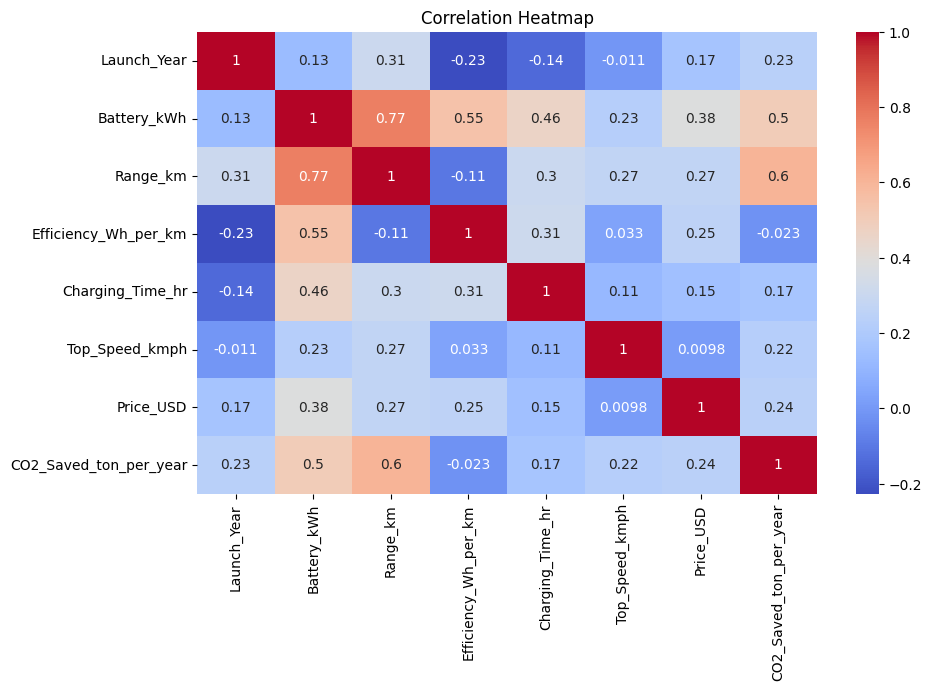

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Step 4: Prepare the data for training

# Drop columns that are not useful for prediction (like IDs or names)
X = df.drop(['Price_USD', 'Vehicle_ID', 'Brand', 'Model', 'Type'], axis=1)

# Target variable
y = df['Price_USD']

# Convert categorical columns (like 'Fast_Charging') to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

print("✅ Data prepared for training.")
print("Feature shape:", X.shape)

✅ Data prepared for training.
Feature shape: (200, 8)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")

✅ Model trained successfully!
R² Score: 0.242
Mean Absolute Error: 14274.12


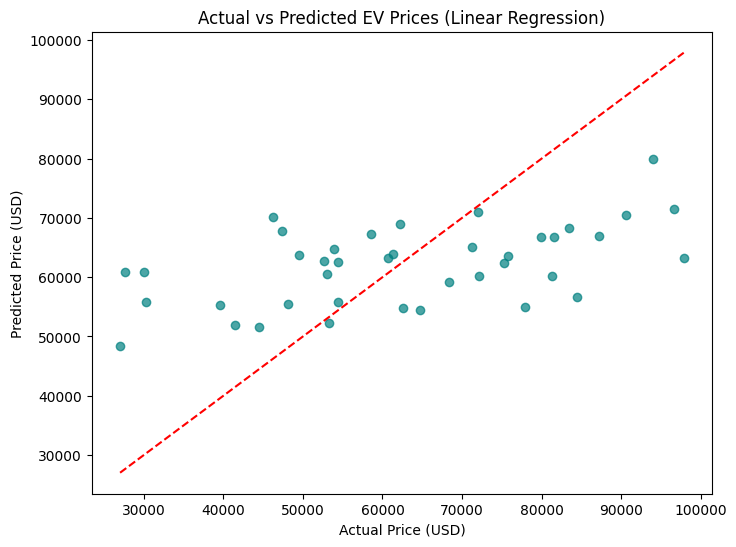

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted EV Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()